## **Installing Libraries**

In [1]:
!pip install opencv-python matplotlib

In [7]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
!yolo checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6582.3/8062.4 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    31.35 GB
Disk                   6582.3/8062.4 GB
CPU                    Intel Xeon CPU @ 2.00GHz
CPU count              4
GPU                    Tesla T4, 15095MiB
GPU count              2
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
op

## **Importing Libraries**

In [4]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd

## **Visualizing images, labels, boundary boxes from each data split**


--- Visualizing train ---


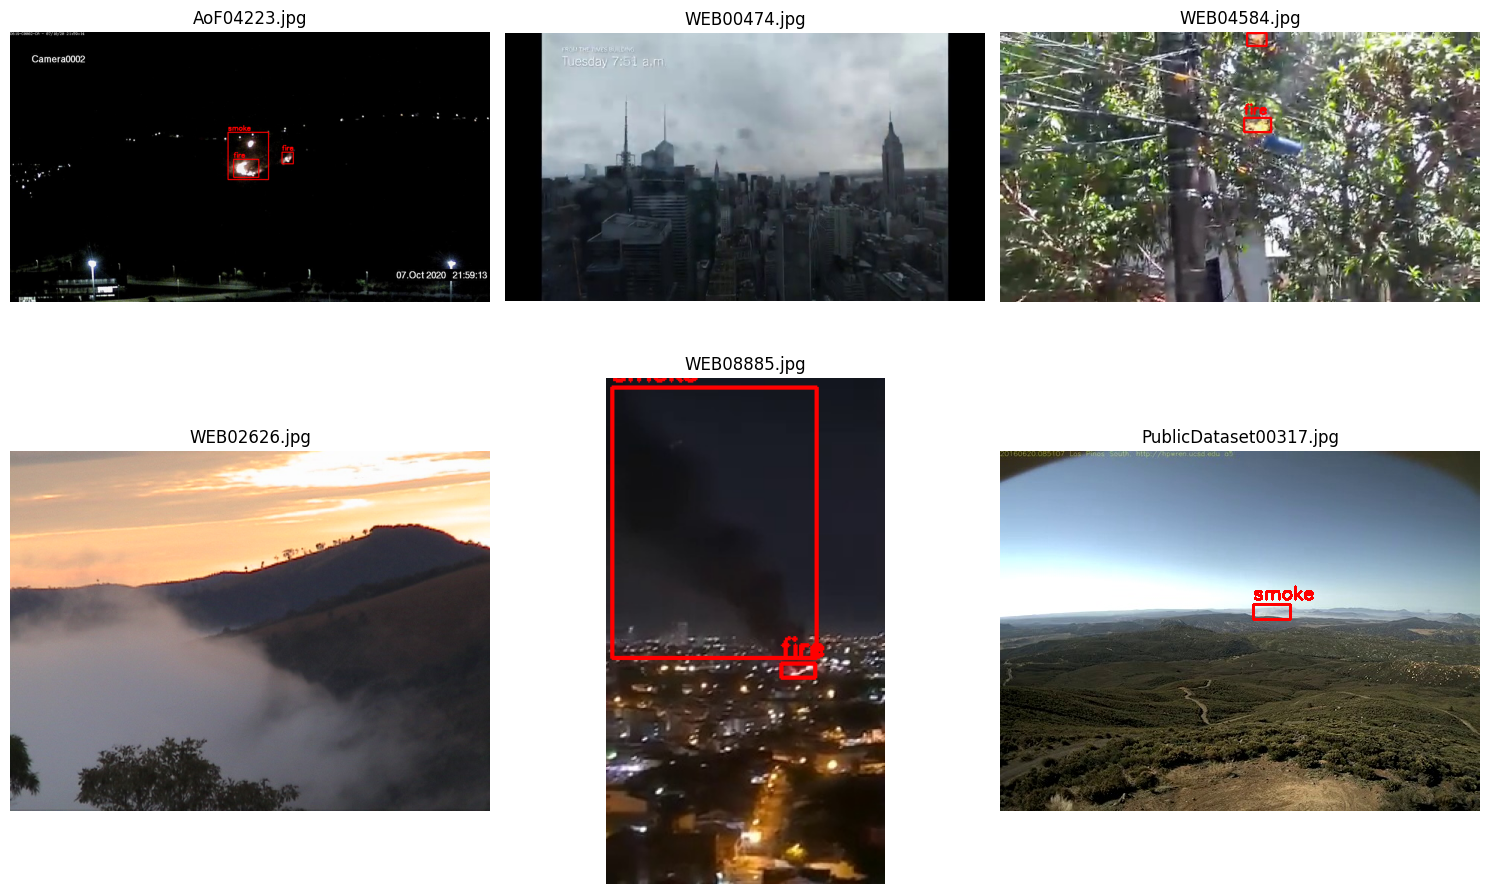


--- Visualizing val ---


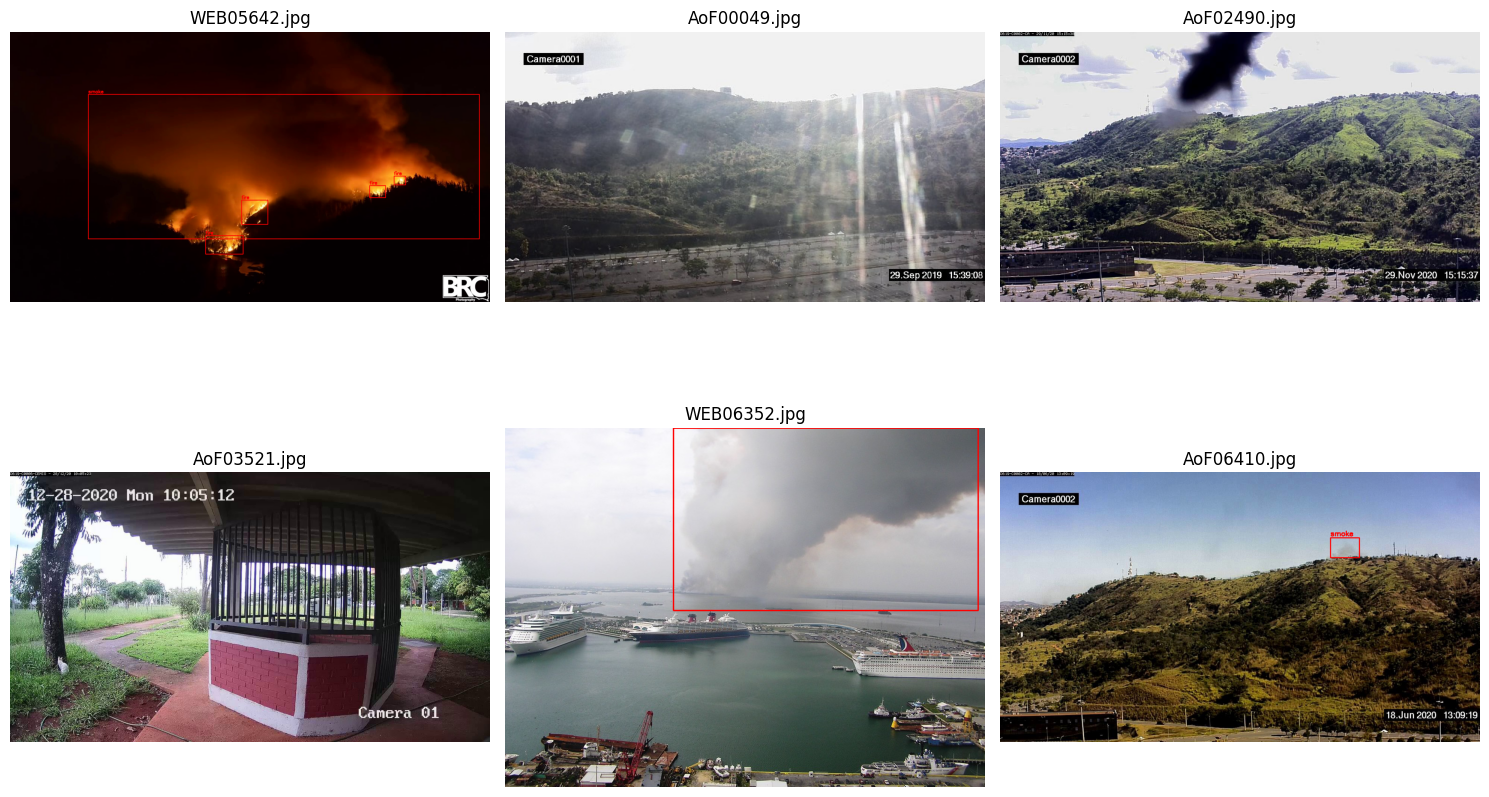


--- Visualizing test ---


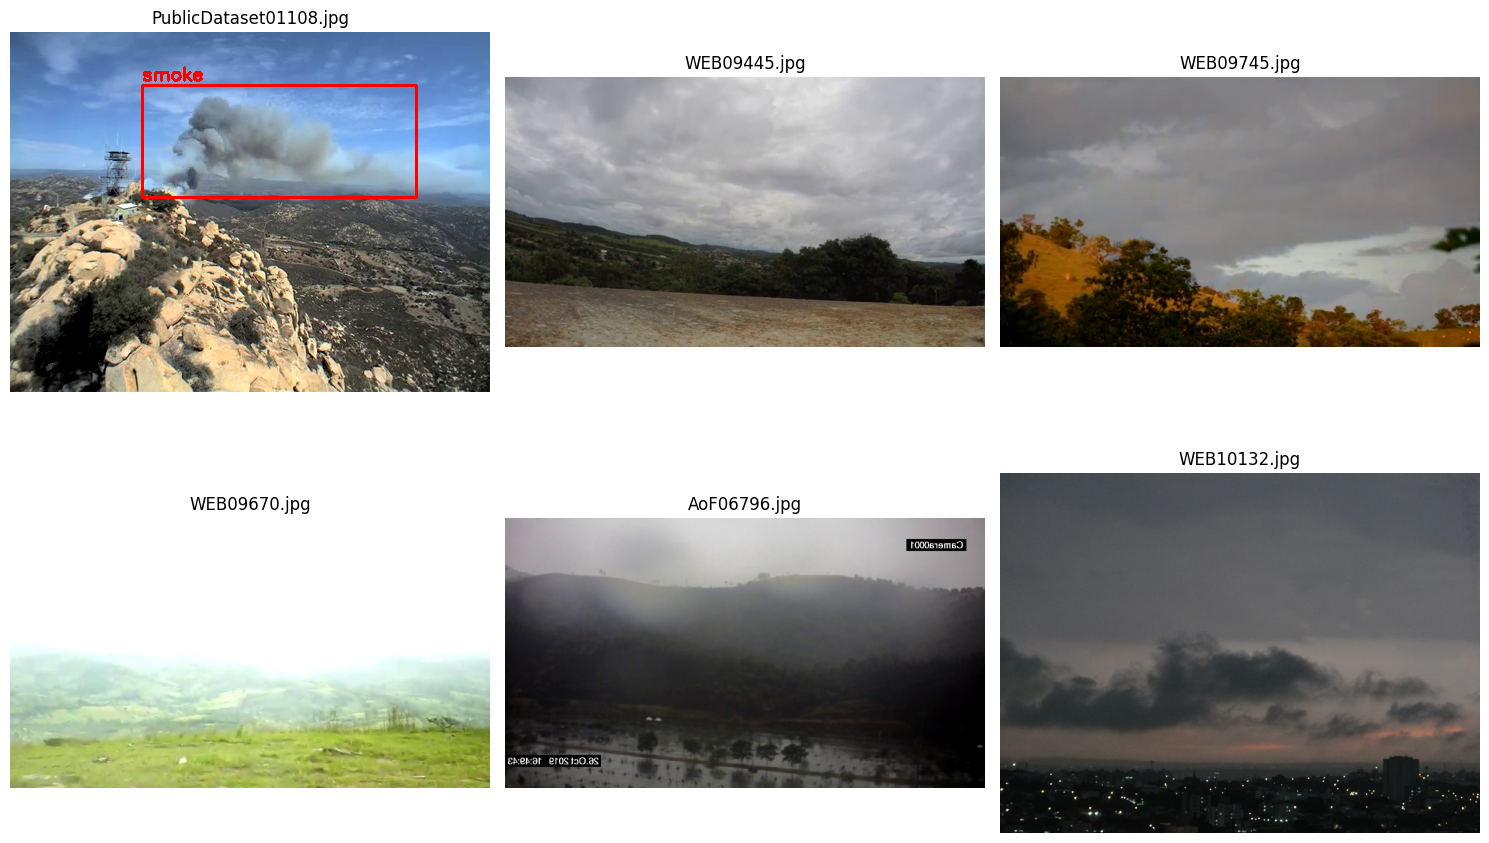

In [5]:
DATASET_PATH = "/kaggle/input/smoke-fire-detection-yolo/data"
SPLITS = ["train", "val", "test"]
CLASSES = {
    0: "smoke",
    1: "fire"
}
NUM_IMAGES = 6  

##convert yolo dimensions to coordinates to visualize
def yolo_to_bbox(img_w, img_h, x, y, w, h):
    x1 = int((x - w / 2) * img_w)
    y1 = int((y - h / 2) * img_h)
    x2 = int((x + w / 2) * img_w)
    y2 = int((y + h / 2) * img_h)
    return x1, y1, x2, y2

##visulize from all splits - boundary boxes - labels
for SPLIT in SPLITS:
    print(f"\n--- Visualizing {SPLIT} ---")
    images_dir = os.path.join(DATASET_PATH, SPLIT, "images")
    labels_dir = os.path.join(DATASET_PATH, SPLIT, "labels")

    image_files = random.sample(os.listdir(images_dir), min(NUM_IMAGES, len(os.listdir(images_dir))))

    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(images_dir, img_name)
        label_path = os.path.join(labels_dir, img_name.replace(".jpg", ".txt"))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    cls, x, y, bw, bh = map(float, line.split())
                    x1, y1, x2, y2 = yolo_to_bbox(w, h, x, y, bw, bh)

                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(
                        img,
                        CLASSES[int(cls)],
                        (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (255, 0, 0),
                        2
                    )

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name)

    plt.tight_layout()
    plt.show()


## **Editing yaml file**

In [10]:
# المسار الجديد للملف
yaml_path = "/kaggle/working/data.yaml"

# محتوى الملف بعد التعديل
yaml_content = """
train: /kaggle/input/smoke-fire-detection-yolo/data/train
val: /kaggle/input/smoke-fire-detection-yolo/data/val
test: /kaggle/input/smoke-fire-detection-yolo/data/test

names: ['smoke', 'fire']
nc: 2
"""

# كتابة الملف
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("updated data.yaml")


updated data.yaml


## **Training Base Line model "YOLOv8m"**

In [ ]:
!yolo detect train \
  model=yolov8m.pt \
  data=/kaggle/working/data.yaml \
  epochs=100 \
  imgsz=640 \
  patience=20

In [6]:
!yolo train resume model=/kaggle/working/runs/detect/train4/weights/last.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

## **Showing learning curves**

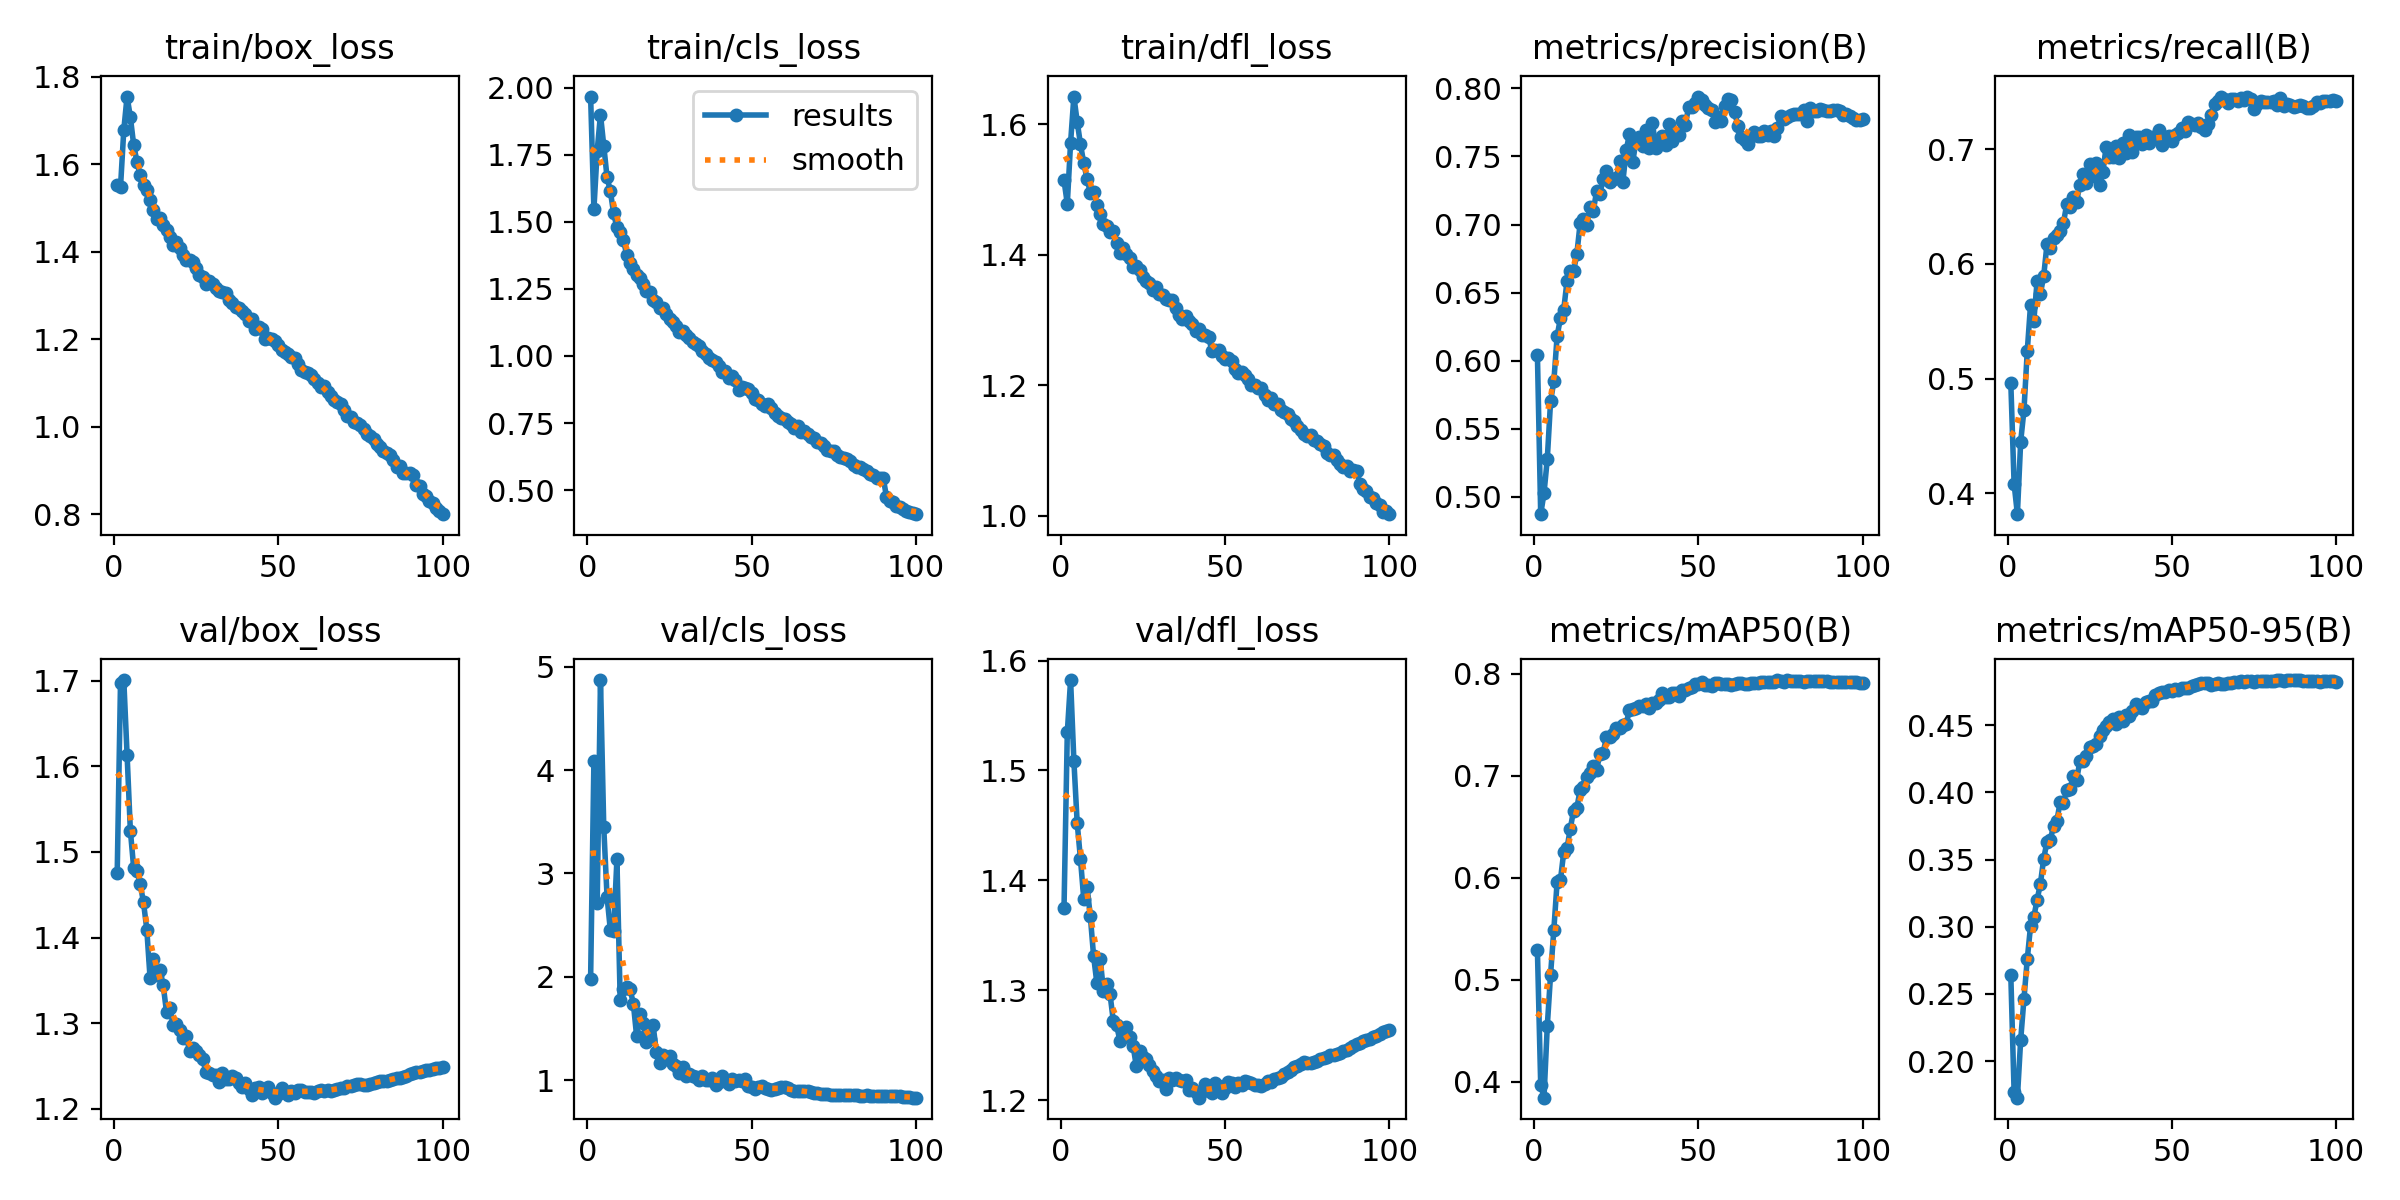

In [2]:
from PIL import Image
from IPython.display import display

run_dir = "/kaggle/working/runs/detect/train4"
display(Image.open(f"{run_dir}/results.png"))

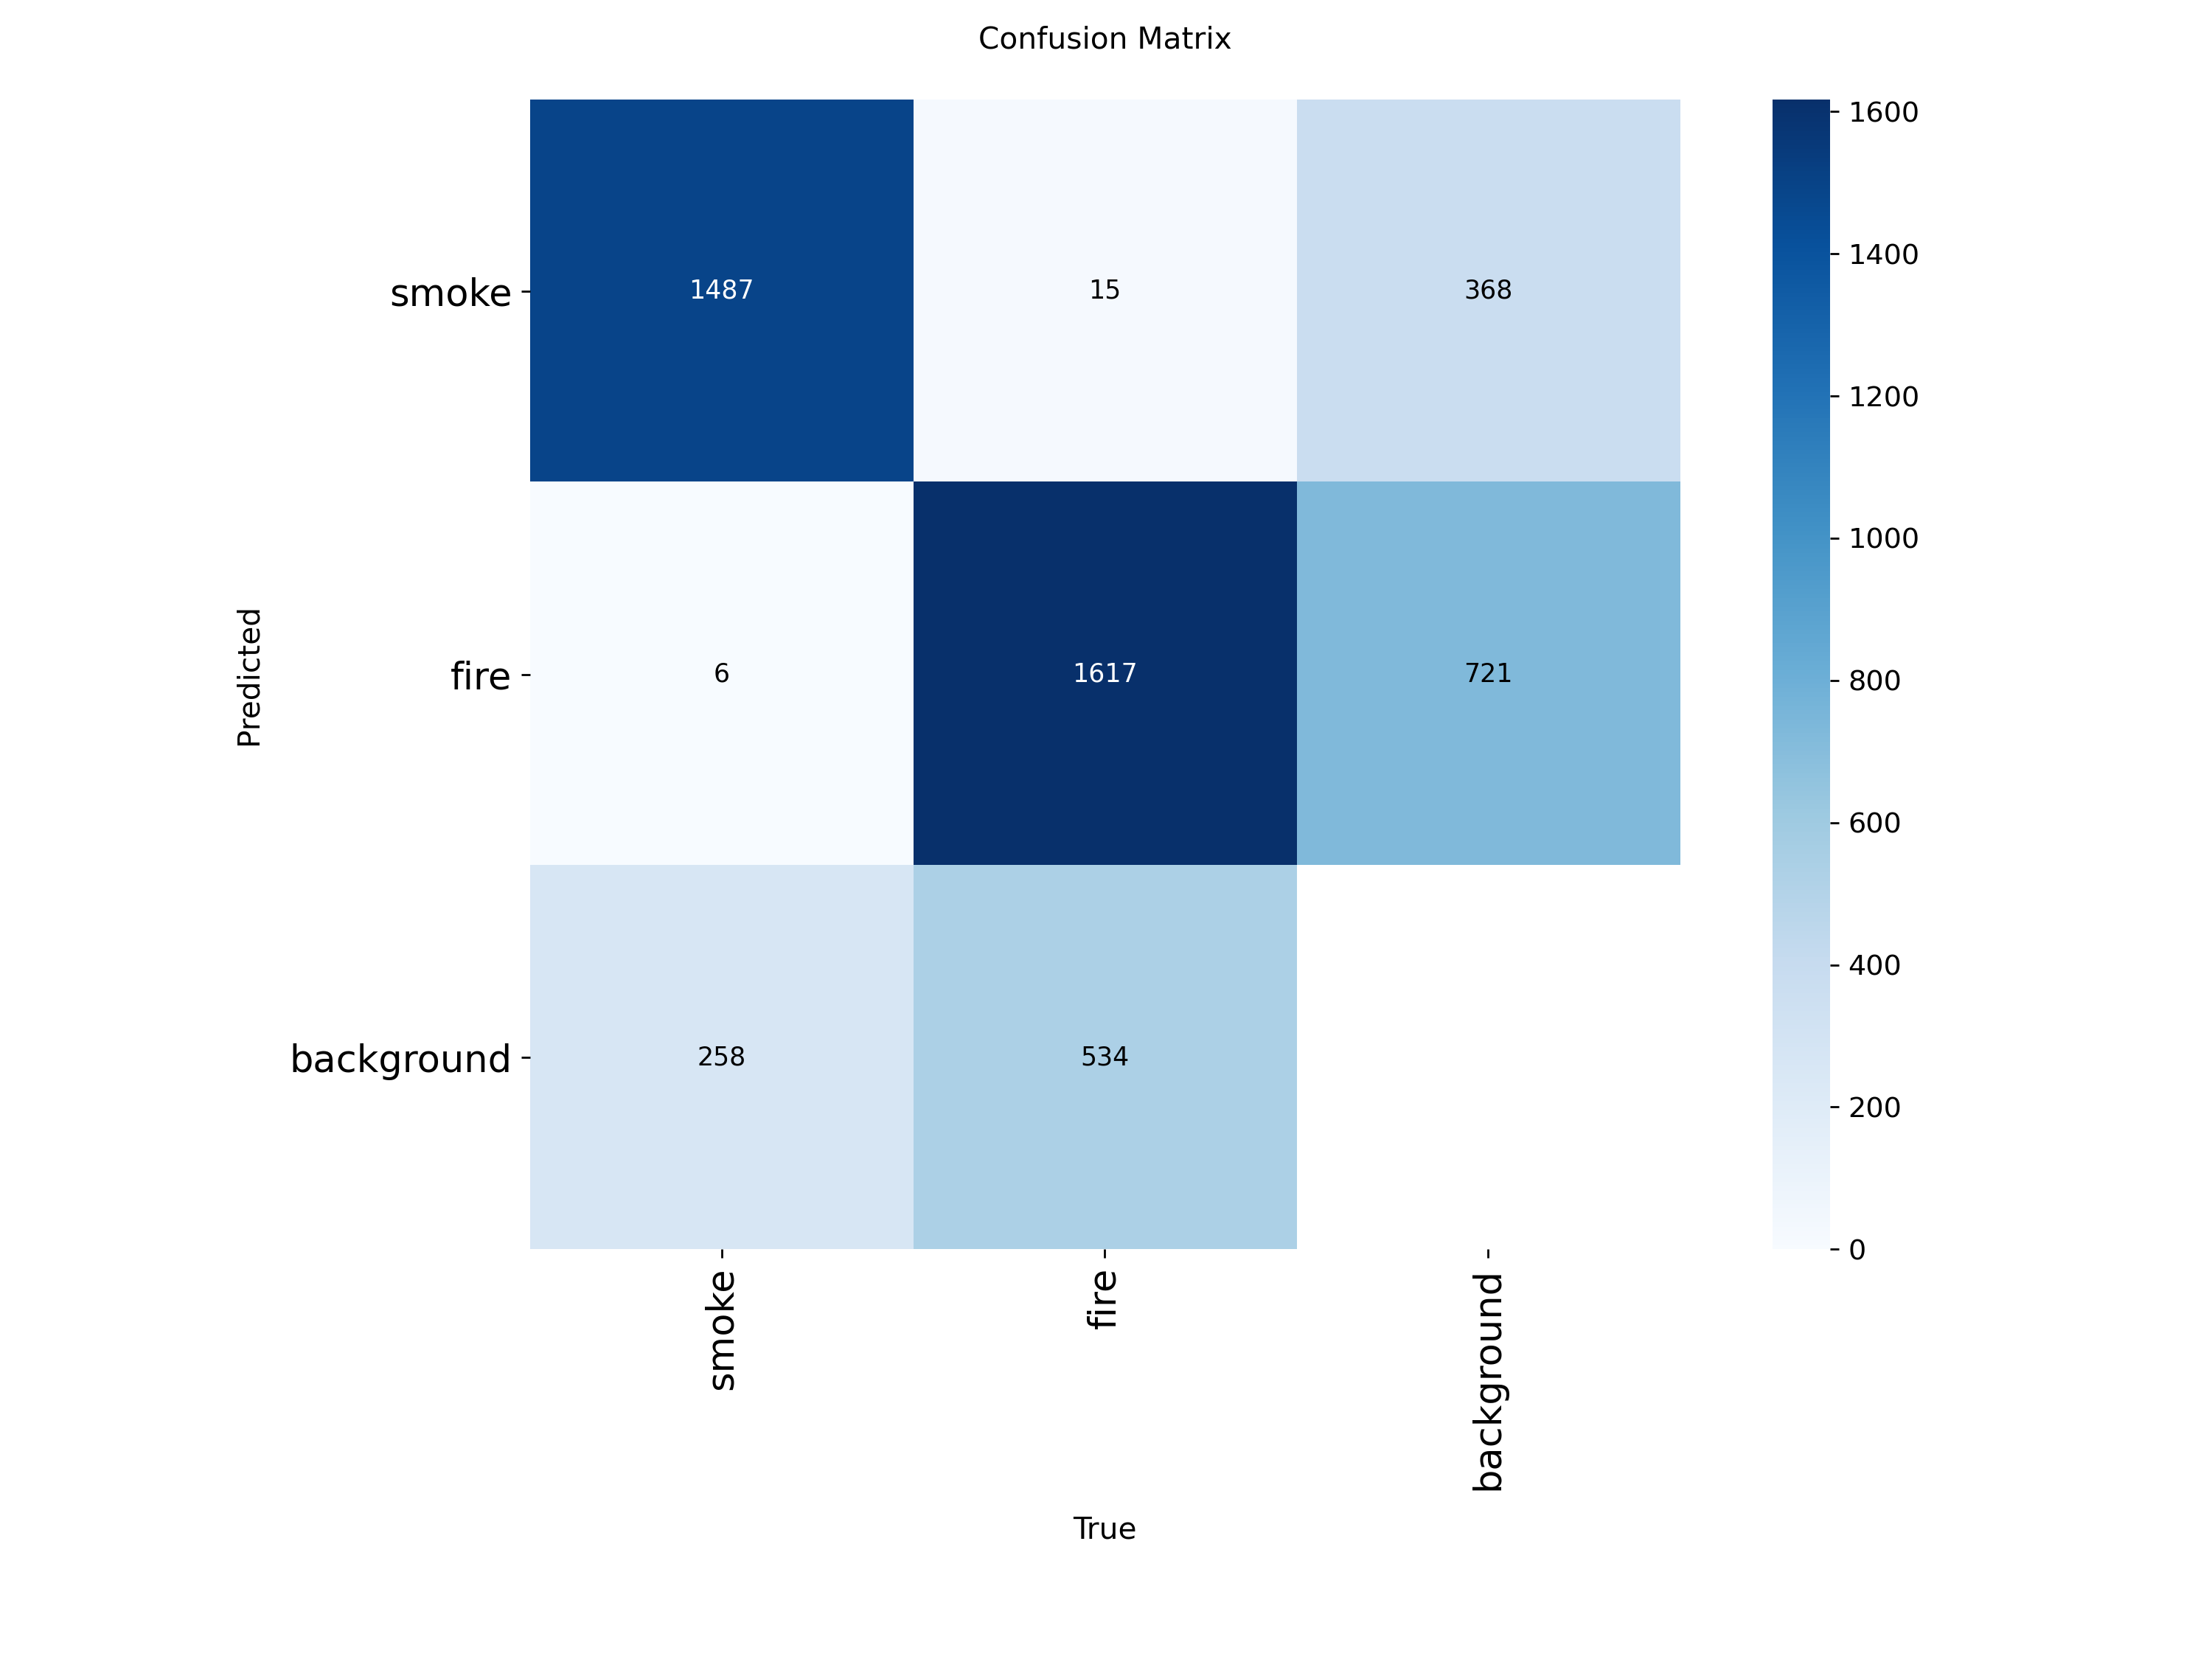

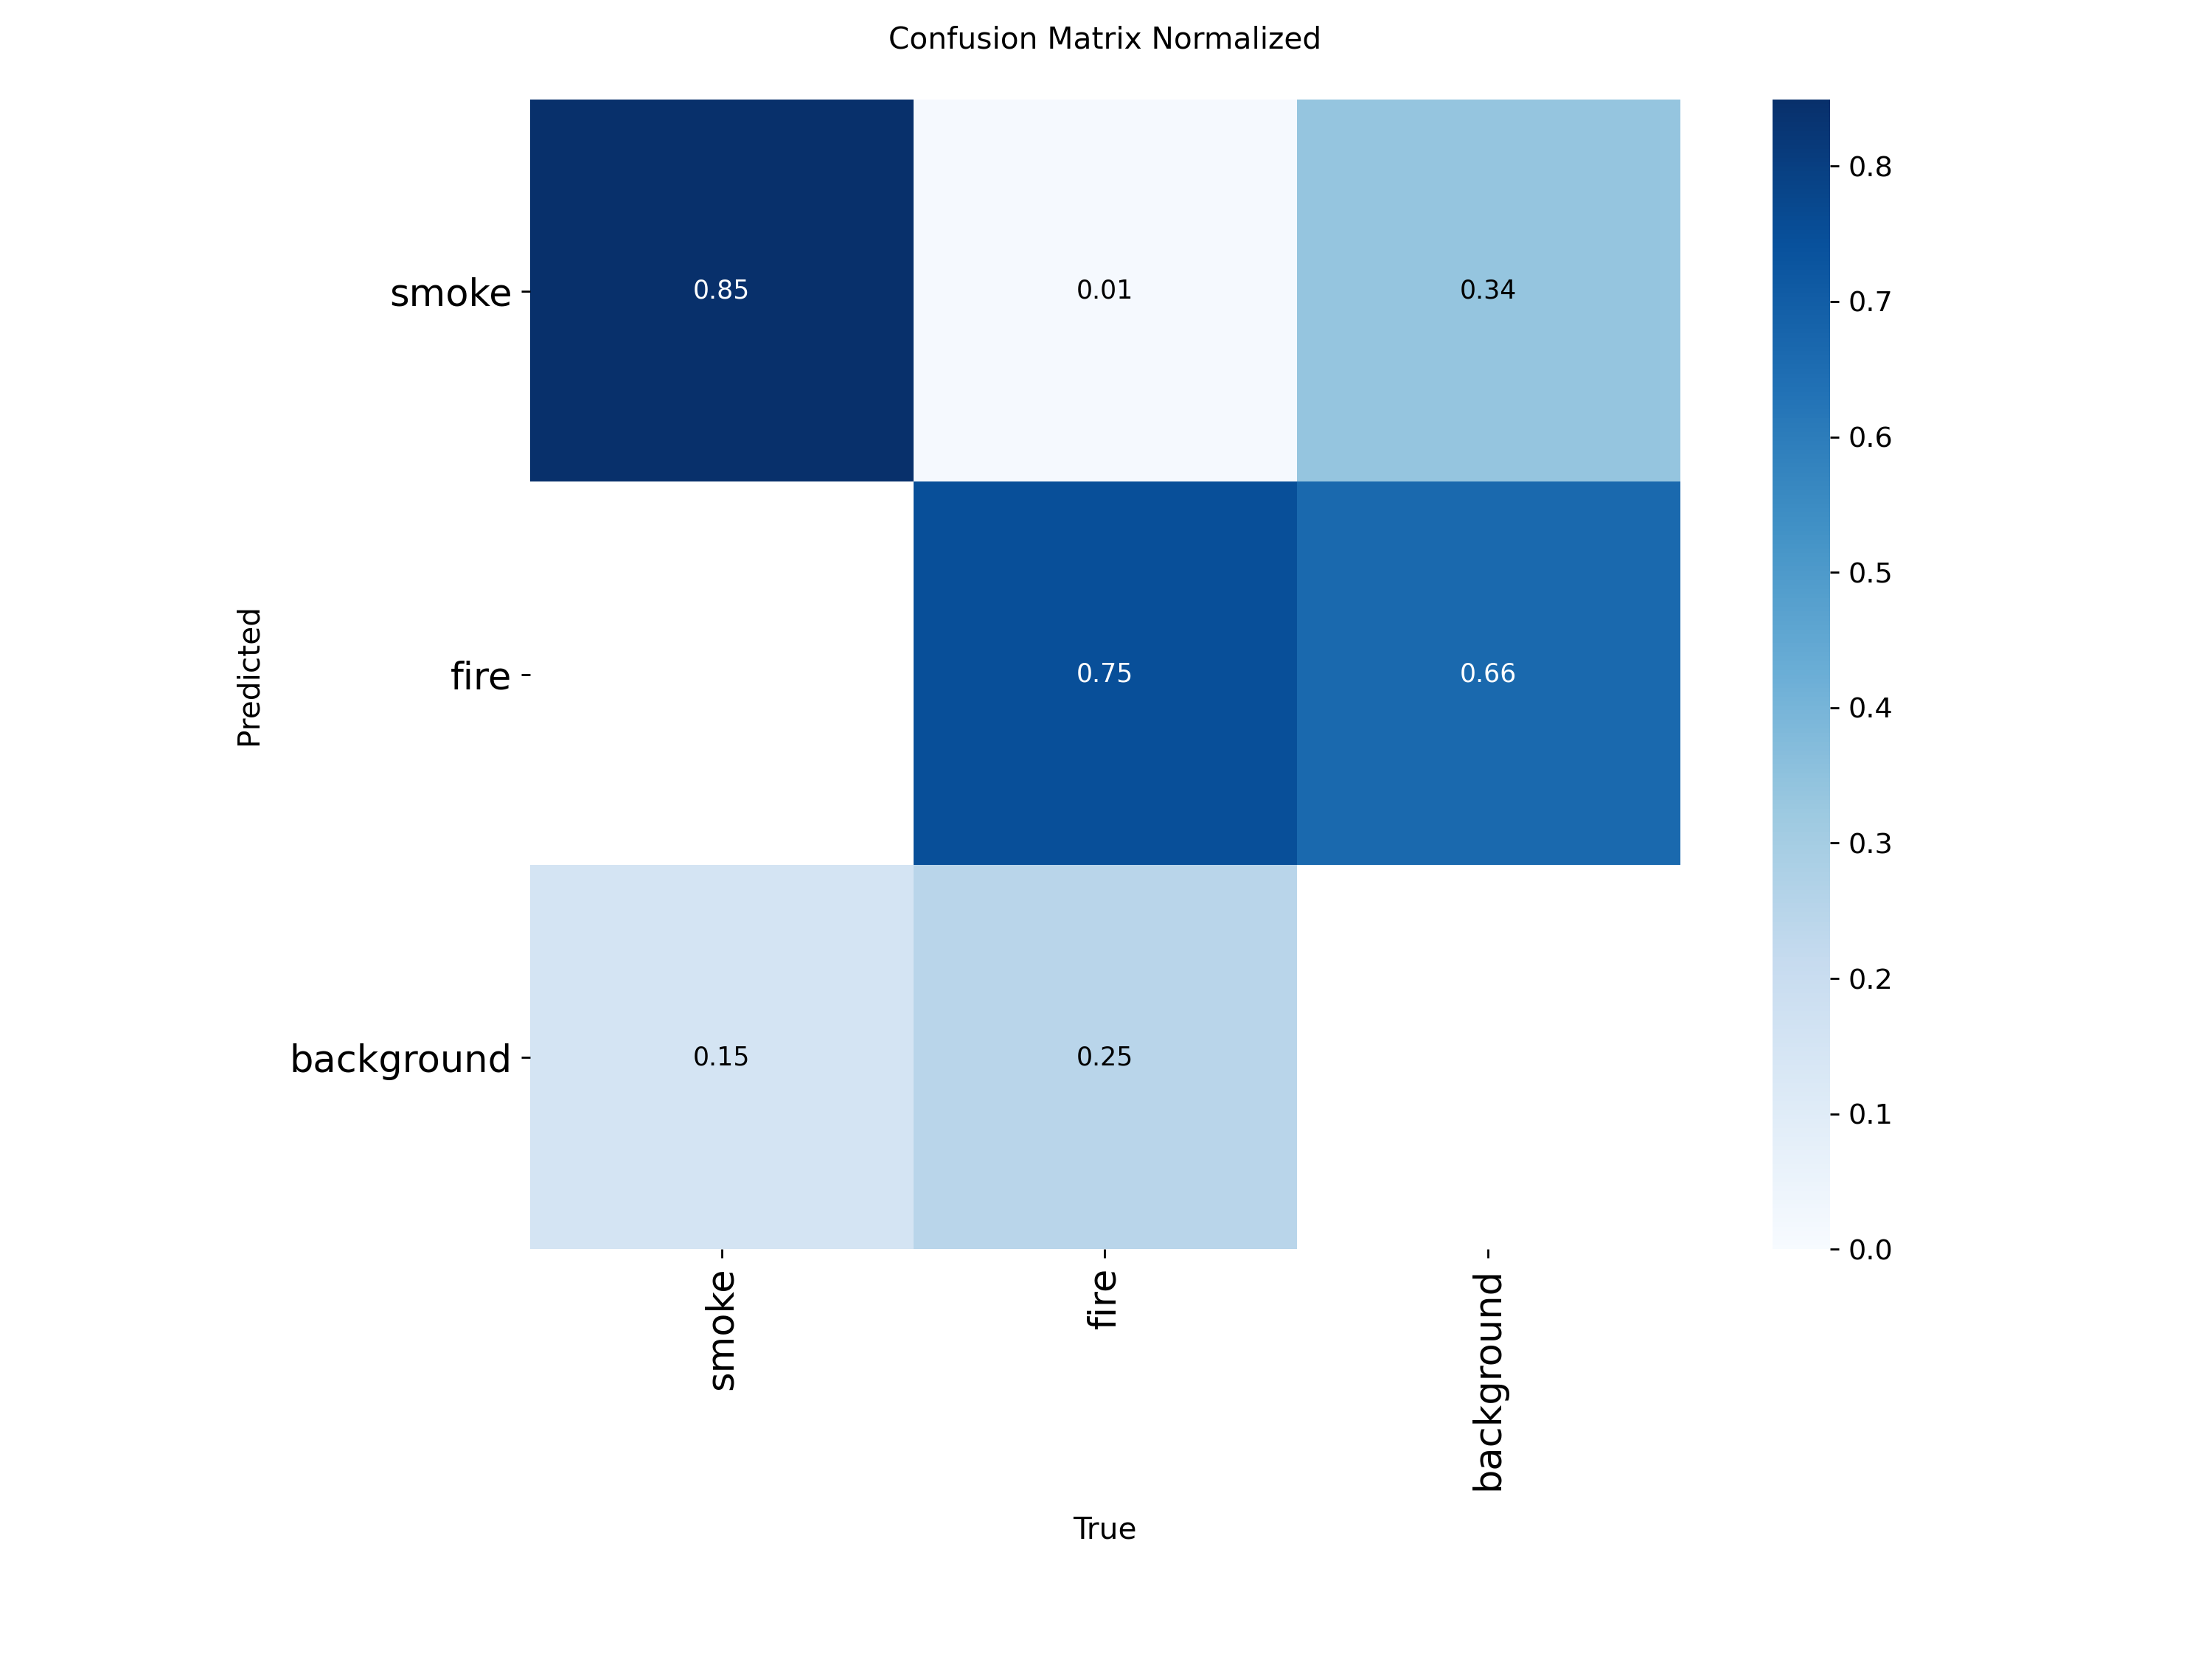

In [3]:
for f in ["confusion_matrix.png", "confusion_matrix_normalized.png"]:
    p = os.path.join(run_dir, f)
    if os.path.exists(p):
        display(Image.open(p))
    else:
        print("Not found:", p)

## **Reading training results**

In [5]:
df = pd.read_csv(f"{run_dir}/results.csv")
df.columns = df.columns.str.strip()

df["fitness"] = df["metrics/mAP50(B)"]*0.1 + df["metrics/mAP50-95(B)"]*0.9

best_i = df["fitness"].idxmax()
print("best_epoch =", int(df.loc[best_i, "epoch"]))
print("best_mAP50 =", float(df.loc[best_i, "metrics/mAP50(B)"]))
print("best_mAP50_95 =", float(df.loc[best_i, "metrics/mAP50-95(B)"]))

best_epoch = 86
best_mAP50 = 0.79344
best_mAP50_95 = 0.48356


## **Model Testing**

In [11]:
!yolo detect val \
  model=runs/detect/train4/weights/best.pt \
  data=/kaggle/working/data.yaml \
  split=test

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.3 ms, read: 23.7±22.1 MB/s, size: 244.0 KB)
val: Scanning /kaggle/input/smoke-fire-detection-yolo/data/test/labels... 4295 images, 2005 backgrounds, 15 corrupt: 100% ━━━━━━━━━━━━ 4306/4306 244.8it/s 17.6s<0.1s
val: /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10769.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0297]
val: /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB10775.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0156]
val: /kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB11243.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/test/images/WEB11243.jpg'
val: /kaggle/input/smoke-fire-detection-yolo/da

## **Model Prediction**

In [12]:
!yolo detect predict \
  model=runs/detect/train4/weights/best.pt \
  source=/kaggle/input/test-images/ex1.jpg \
  conf=0.25

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /kaggle/input/test-images/ex1.jpg: 448x640 1 smoke, 2 fires, 77.7ms
Speed: 6.2ms preprocess, 77.7ms inference, 26.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /kaggle/working/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


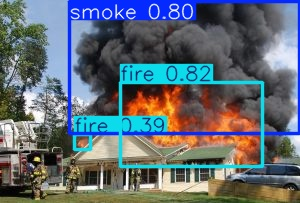

In [13]:
display(Image.open("/kaggle/working/runs/detect/predict/ex1.jpg"))

In [16]:
!yolo detect predict \
  model=runs/detect/train4/weights/best.pt \
  source=/kaggle/input/test-images/gen_fire.mp4 \
  conf=0.15

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 10 fires, 73.9ms
video 1/1 (frame 2/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 8 fires, 25.0ms
video 1/1 (frame 3/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 9 fires, 25.0ms
video 1/1 (frame 4/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 7 fires, 25.1ms
video 1/1 (frame 5/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 8 fires, 25.0ms
video 1/1 (frame 6/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 9 fires, 25.0ms
video 1/1 (frame 7/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 9 fires, 25.0ms
video 1/1 (frame 8/253) /kaggle/input/test-images/gen_fire.mp4: 384x640 1 smoke, 9 fires, 20.2ms
video 1/1 (frame 9/253) /kaggle/input/test-images/gen_fir